In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import scipy.stats as stats
from scipy.stats import zscore
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, binarize
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import roc_curve,roc_auc_score, mean_squared_error,accuracy_score,classification_report,cluster,confusion_matrix, cohen_kappa_score
from scipy.stats import shapiro , levene , mannwhitneyu , chi2_contingency , chisquare
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from warnings import filterwarnings
filterwarnings('ignore')
sns.set_style('whitegrid')

## Reading the dataset

In [3]:
data = pd.read_csv("../input/indian-liver-patientd/ILPD.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data = pd.read_csv ( "../input/indian-liver-patientd/ILPD.csv" , names = [ "Age" , "Gender" , "TB" , "DB" , "AAP" ,
                            "SGPT" , "SGOT" , "TP" , "ALB" , "AGRAGR" , "Selector" ] )
data.head ( )

,Age,Gender,TB,DB,AAP,SGPT,SGOT,TP,ALB,AGRAGR,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Summarizing important observations from the data set.

In [5]:
print ( "Number of Rows in the dataset:" , data.shape [ 0 ] )
print ( "Number of Columns in the dataset:" , data.shape [ 1 ] )

Number of Rows in the dataset: 583
Number of Columns in the dataset: 11


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age         583 non-null int64
Gender      583 non-null object
TB          583 non-null float64
DB          583 non-null float64
AAP         583 non-null int64
SGPT        583 non-null int64
SGOT        583 non-null int64
TP          583 non-null float64
ALB         583 non-null float64
AGRAGR      579 non-null float64
Selector    583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
categorical = list ( data.select_dtypes ( include = "object" ).columns )
print ( "Categorical features:\n" , categorical )
print ( "\n" )
numerical = list ( data.select_dtypes ( exclude = "object" ).columns )
print ( "Continuous features:\n" , numerical )

Categorical features:
 ['Gender']


Continuous features:
 ['Age', 'TB', 'DB', 'AAP', 'SGPT', 'SGOT', 'TP', 'ALB', 'AGRAGR', 'Selector']


In [8]:
# Since the target variablle is numerical, converting it to categorical.
data [ "Selector" ] = data [ "Selector" ].astype ( str )

In [9]:
categorical = list ( data.select_dtypes ( include = "object" ).columns )
print ( "Categorical features:\n" , categorical )
print ( "\n" )
numerical = list ( data.select_dtypes ( exclude = "object" ).columns )
print ( "Continuous features:\n" , numerical )

Categorical features:
 ['Gender', 'Selector']


Continuous features:
 ['Age', 'TB', 'DB', 'AAP', 'SGPT', 'SGOT', 'TP', 'ALB', 'AGRAGR']


#### Five point summary:

In [10]:
#For numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
TB,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
DB,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
AAP,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
SGPT,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
SGOT,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
TP,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
ALB,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
AGRAGR,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8


In [11]:
#For all features
data.describe ( include = "all" ).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,583,NaN,NaN,NaN,44.7461,16.1898,4,33,45,58,90
Gender,583,2,Male,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TB,583,NaN,NaN,NaN,3.2988,6.20952,0.4,0.8,1,2.6,75
DB,583,NaN,NaN,NaN,1.48611,2.8085,0.1,0.2,0.3,1.3,19.7
AAP,583,NaN,NaN,NaN,290.576,242.938,63,175.5,208,298,2110
SGPT,583,NaN,NaN,NaN,80.7136,182.62,10,23,35,60.5,2000
SGOT,583,NaN,NaN,NaN,109.911,288.919,10,25,42,87,4929
TP,583,NaN,NaN,NaN,6.48319,1.08545,2.7,5.8,6.6,7.2,9.6
ALB,583,NaN,NaN,NaN,3.14185,0.795519,0.9,2.6,3.1,3.8,5.5
AGRAGR,579,NaN,NaN,NaN,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8


#### Summarize observations for categorical variables – no. of categories, % observations in each category 

Column: Gender


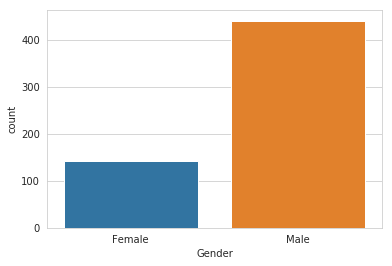

Male      441
Female    142
Name: Gender, dtype: int64
Male 	 75.64 %
Female 	 24.36 %


Column: Selector


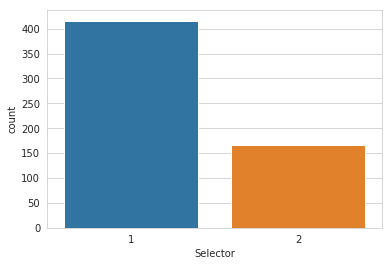

1    416
2    167
Name: Selector, dtype: int64
1 	 71.36 %
2 	 28.64 %




In [12]:
for i in categorical:
    print ( "Column:" , i )
    sns.countplot(data[i])
    plt.show()
    print ( data [ i ].value_counts ( ) ) 
    d = data [ i ].value_counts ( )
    j = 0
    for i in d.index:
        print ( i , "\t" , round ( ( ( d [ j ] / data.shape [ 0 ] ) * 100  ) , 2 ) , "%" )
        j += 1
    
    print ( "\n" )

In [13]:
data.info ( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age         583 non-null int64
Gender      583 non-null object
TB          583 non-null float64
DB          583 non-null float64
AAP         583 non-null int64
SGPT        583 non-null int64
SGOT        583 non-null int64
TP          583 non-null float64
ALB         583 non-null float64
AGRAGR      579 non-null float64
Selector    583 non-null object
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB


In [14]:
# number of distinct observations
data.nunique ( )

Age          72
Gender        2
TB          113
DB           80
AAP         263
SGPT        152
SGOT        177
TP           58
ALB          40
AGRAGR       69
Selector      2
dtype: int64

In [15]:
#Finding out missing or null values
data.isnull ( ).sum ( )

Age         0
Gender      0
TB          0
DB          0
AAP         0
SGPT        0
SGOT        0
TP          0
ALB         0
AGRAGR      4
Selector    0
dtype: int64

- There are 4 missing values in the AGAGR ( A/G Ratio Albumin and Globulin Ratio ) feature.

In [16]:
# Computing missing values in percentage
data.isnull ( ).sum ( ) / data.shape [ 0 ] * 100

Age         0.000000
Gender      0.000000
TB          0.000000
DB          0.000000
AAP         0.000000
SGPT        0.000000
SGOT        0.000000
TP          0.000000
ALB         0.000000
AGRAGR      0.686106
Selector    0.000000
dtype: float64

- The missing values in AGAGR constitutes for only 0.69% for the same.

In [17]:
# Imputing AGAGR with mode since there are only 4 missing values
print ( "Imputing AGAGR with mode as:" , data [ "AGRAGR" ].mode ( ) [ 0 ] )
data [ "AGRAGR" ].fillna ( data [ "AGRAGR" ].mode ( ) [ 0 ] , inplace = True )

Imputing AGAGR with mode as: 1.0


In [18]:
data.isnull ( ).sum ( ) / data.shape [ 0 ] * 100

Age         0.0
Gender      0.0
TB          0.0
DB          0.0
AAP         0.0
SGPT        0.0
SGOT        0.0
TP          0.0
ALB         0.0
AGRAGR      0.0
Selector    0.0
dtype: float64

#### Finding outliers if any:

Countplot for feature: Gender


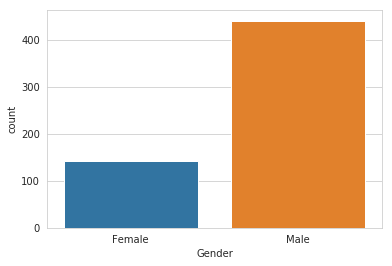

Countplot for feature: Selector


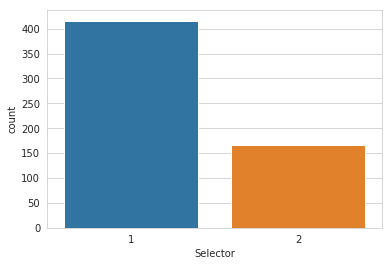

In [19]:
for i in categorical:
    print ( "Countplot for feature:" , i )
    sns.countplot ( data [ i ] )
    plt.show ( )

Boxplot for feature: Age


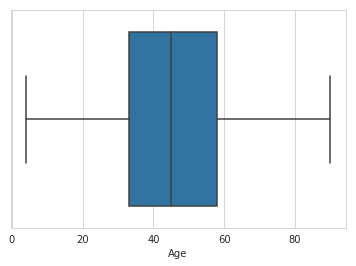

Boxplot for feature: TB


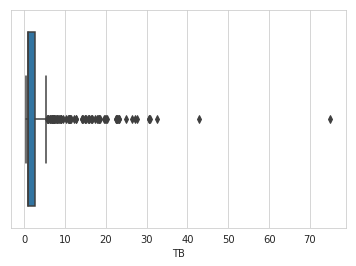

Boxplot for feature: DB


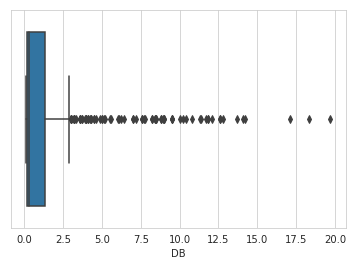

Boxplot for feature: AAP


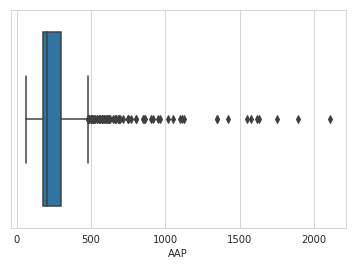

Boxplot for feature: SGPT


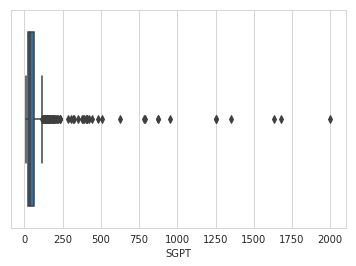

Boxplot for feature: SGOT


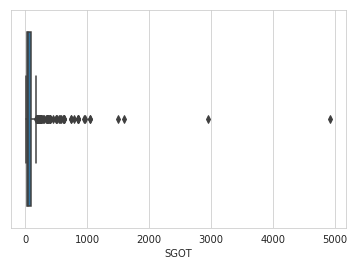

Boxplot for feature: TP


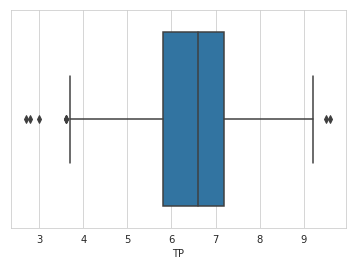

Boxplot for feature: ALB


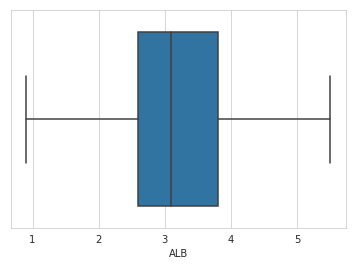

Boxplot for feature: AGRAGR


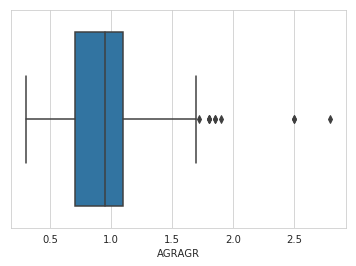

In [20]:
#To find outliers:
for i in numerical:
    print ( "Boxplot for feature:" , i )
    sns.boxplot ( data [ i ] )
    plt.show ( )

DistPlot for feature: Age
Skewness for Age is: -0.029385312710346265
Kurtosis for Age is: -0.5600656409430136


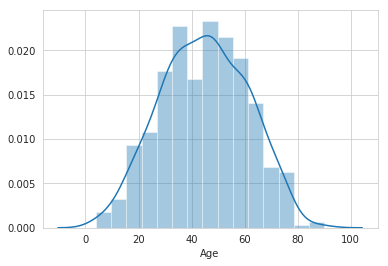

DistPlot for feature: TB
Skewness for TB is: 4.90747399372197
Kurtosis for TB is: 37.16379152039628


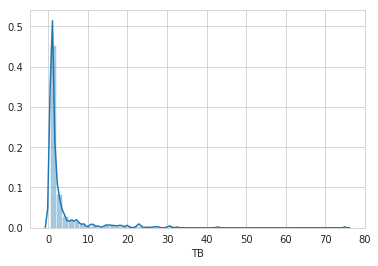

DistPlot for feature: DB
Skewness for DB is: 3.21240286208773
Kurtosis for DB is: 11.352528764019558


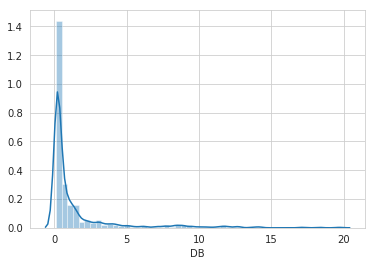

DistPlot for feature: AAP
Skewness for AAP is: 3.7651063973073766
Kurtosis for AAP is: 17.752828457480053


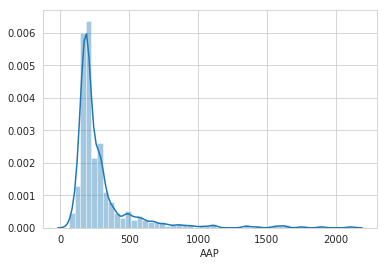

DistPlot for feature: SGPT
Skewness for SGPT is: 6.549191929444977
Kurtosis for SGPT is: 50.57944964495758


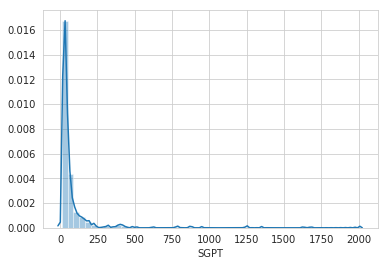

DistPlot for feature: SGOT
Skewness for SGOT is: 10.54617721691247
Kurtosis for SGOT is: 150.91988364408164


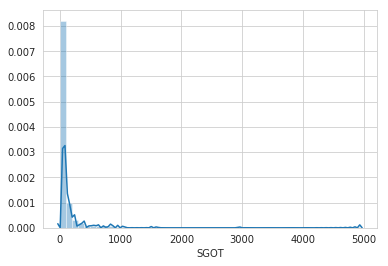

DistPlot for feature: TP
Skewness for TP is: -0.28567218643573844
Kurtosis for TP is: 0.23303858560487622


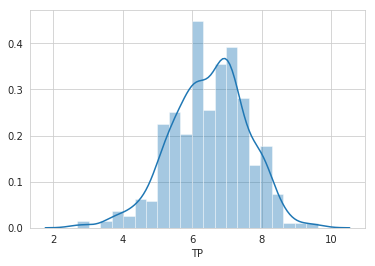

DistPlot for feature: ALB
Skewness for ALB is: -0.04368472854683253
Kurtosis for ALB is: -0.3879048071837383


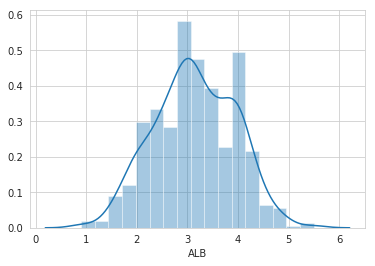

DistPlot for feature: AGRAGR
Skewness for AGRAGR is: 0.9920209486929165
Kurtosis for AGRAGR is: 3.3181878903768767


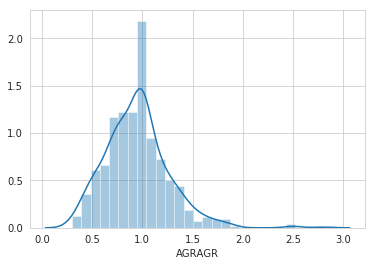

In [21]:
for i in numerical:
    print ( "DistPlot for feature:" , i )
    print ( "Skewness for" , i , "is:" , data [ i ].skew ( ) )
    print ( "Kurtosis for" , i , "is:" , data [ i ].kurtosis ( ) )

    sns.distplot ( data [ i ] )
    plt.show ( )

- Variables have outliers but since the extreme values are genuine and since the data is less, we will not eliminate those.
- Instead, we will go for Standard scaling so as to normalize the features.

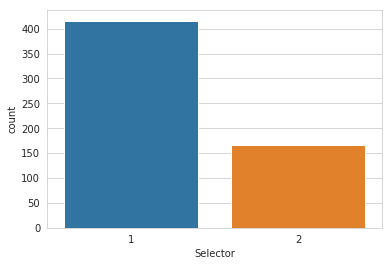

1    416
2    167
Name: Selector, dtype: int64
Selector 	 71.36 %
Selector 	 28.64 %


In [22]:
#Count for target variables
sns.countplot(data['Selector'])
plt.show()
print ( data [ 'Selector' ].value_counts ( ) ) 
d = data [ 'Selector' ].value_counts ( )
j=0
for i in d.index:
        print ( 'Selector' , "\t" , round ( ( ( d [ j ] / data.shape [ 0 ] ) * 100  ) , 2 ) , "%" )
        j += 1

- The target variable is not evenly distributed and therefore, we need to balance it. 
- In classification we can balance the data using SMOTE or NearMiss.
- According to it if the minority class is less than 20% of the majority class, we need to balance the data.
- But the minority class in this case is above 20% of the majority class. 
- Hence, we don't need to use Balancing methods.

In [23]:
# Converting target variable to categorical sing the feature is inter of '0' and '1'.
data [ "Selector" ] = data [ "Selector" ].astype ( int )

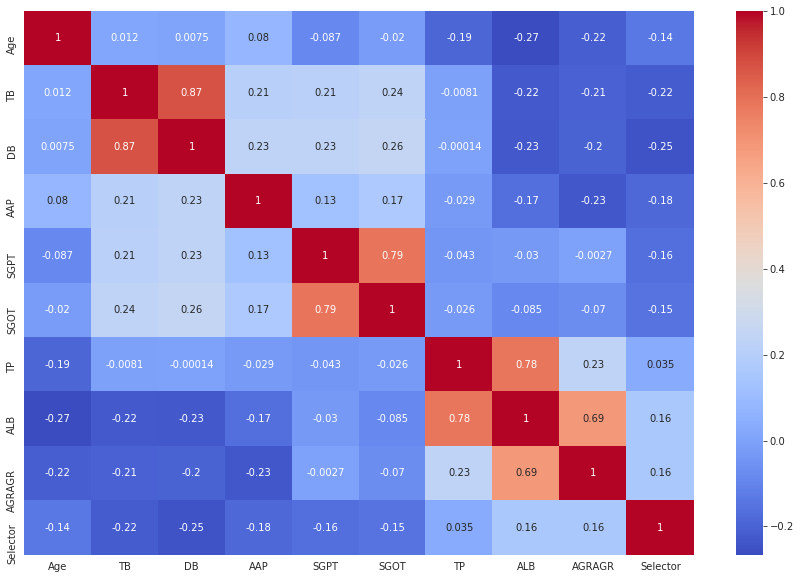

In [24]:
#Heatmap
plt.figure(figsize = ( 15 , 10 ) )
sns.heatmap ( data.corr ( ) , cmap = "coolwarm" , annot = True )
plt.show ( )

- The highly correlated independent variables are:
    - TB and DB
    - SGPT and SGOT
    - ALB and TP
    - AGRAGR and ALB

- There is no highly correlated independent variable with target variable.

- We can check for VIF for multicloinearity and if the features are highly correlated features and show multicolinearity, we can drop those while building the model.

In [25]:
#Correlation w.r.t. target variable
target = data.corr ( )
target = target [ "Selector" ]
print ( target )

Age        -0.137351
TB         -0.220208
DB         -0.246046
AAP        -0.184866
SGPT       -0.163416
SGOT       -0.151934
TP          0.035008
ALB         0.161388
AGRAGR      0.162843
Selector    1.000000
Name: Selector, dtype: float64


In [26]:
# Unpaired T-test for Age with Selector
no = data [ data [ "Selector" ] == 1 ] [ "Age" ]
yes = data [ data [ "Selector" ] == 2 ] [ "Age" ]
print ( shapiro ( data [ "Age" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the age is insignificant." )
print ( "\n" )

(0.9921671152114868, 0.0036761967930942774)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=28990.5, pvalue=0.0008871841242601723)
Since p < 0.05, we reject Ho. Hence, we can conclude that the age is insignificant.




In [27]:
# Unpaired T-test for TB with Selector
no = data [ data [ "Selector" ] == 1 ] [ "TB" ]
yes = data [ data [ "Selector" ] == 2 ] [ "TB" ]
print ( shapiro ( data [ "Age" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the TB is insignificant." )
print ( "\n" )

(0.9921671152114868, 0.0036761967930942774)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=21308.5, pvalue=1.1447594776025207e-13)
Since p < 0.05, we reject Ho. Hence, we can conclude that the TB is insignificant.




In [28]:
# Unpaired T-test for DB with Selector
no = data [ data [ "Selector" ] == 1 ] [ "DB" ]
yes = data [ data [ "Selector" ] == 2 ] [ "DB" ]
print ( shapiro ( data [ "DB" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the DB is insignificant." )
print ( "\n" )

(0.5295110940933228, 1.1563177719145935e-36)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=21809.0, pvalue=3.7155629439927545e-13)
Since p < 0.05, we reject Ho. Hence, we can conclude that the DB is insignificant.




In [29]:
# Unpaired T-test for AAP with Selector
no = data [ data [ "Selector" ] == 1 ] [ "AAP" ]
yes = data [ data [ "Selector" ] == 2 ] [ "AAP" ]
print ( shapiro ( data [ "AAP" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the AAP is insignificant." )
print ( "\n" )

(0.5850894451141357, 5.21741847477215e-35)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=22615.5, pvalue=2.1736171578351033e-11)
Since p < 0.05, we reject Ho. Hence, we can conclude that the AAP is insignificant.




In [30]:
# Unpaired T-test for SGPT with Selector
no = data [ data [ "Selector" ] == 1 ] [ "SGPT" ]
yes = data [ data [ "Selector" ] == 2 ] [ "SGPT" ]
print ( shapiro ( data [ "SGPT" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the SAlA is insignificant." )
print ( "\n" )

(0.32765698432922363, 1.402699762789142e-41)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=21843.0, pvalue=1.1664675691208342e-12)
Since p < 0.05, we reject Ho. Hence, we can conclude that the SAlA is insignificant.




In [31]:
# Unpaired T-test for SGOT with Selector
no = data [ data [ "Selector" ] == 1 ] [ "SGOT" ]
yes = data [ data [ "Selector" ] == 2 ] [ "SGOT" ]
print ( shapiro ( data [ "SGOT" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the TB is insignificant." )
print ( "\n" )

(0.2802243232727051, 1.4839750737199813e-42)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=21035.0, pvalue=4.604831224544726e-14)
Since p < 0.05, we reject Ho. Hence, we can conclude that the TB is insignificant.




In [32]:
# Unpaired T-test for TP with Selector
no = data [ data [ "Selector" ] == 1 ] [ "TP" ]
yes = data [ data [ "Selector" ] == 2 ] [ "TP" ]
print ( shapiro ( data [ "TP" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p > 0.05, we reject Ho. Hence, we can conclude that the TB is significant." )
print ( levene ( no , yes ) )
print ( "Since p > 0.05, we reject Ho. Hence, we can conclude that varaince is equal among categories and the feature is significant." )
print ( "\n" )

(0.9921777248382568, 0.003712408011779189)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=33307.5, pvalue=0.21857332379621958)
Since p > 0.05, we reject Ho. Hence, we can conclude that the TB is significant.
LeveneResult(statistic=0.008136328560547926, pvalue=0.928158100091441)
Since p > 0.05, we reject Ho. Hence, we can conclude that varaince is equal among categories and the feature is significant.




In [33]:
# Unpaired T-test for ALB with Selector
no = data [ data [ "Selector" ] == 1 ] [ "ALB" ]
yes = data [ data [ "Selector" ] == 2 ] [ "ALB" ]
print ( shapiro ( data [ "ALB" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the TB is insignificant." )
print ( "\n" )

(0.992736279964447, 0.006247302517294884)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=27331.0, pvalue=2.783501983914657e-05)
Since p < 0.05, we reject Ho. Hence, we can conclude that the TB is insignificant.




In [34]:
# Unpaired T-test for AGAGR with Selector
no = data [ data [ "Selector" ] == 1 ] [ "AGRAGR" ]
yes = data [ data [ "Selector" ] == 2 ] [ "AGRAGR" ]
print ( shapiro ( data [ "AGRAGR" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the TB is insignificant." )
print ( "\n" )

(0.9460574984550476, 9.858125871609752e-14)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=26419.0, pvalue=2.707911073702188e-06)
Since p < 0.05, we reject Ho. Hence, we can conclude that the TB is insignificant.




In [35]:
#We can use chisquare test of independence.

In [36]:
# Chisquare contigency for Gender and Selector
data [ "Selector" ] = data [ "Selector" ].astype ( int )
cross = pd.crosstab ( data [ "Gender" ] , data [ "Selector" ] )
print ( cross )
print ( chi2_contingency ( cross ) )
print ( "Since p > 0.05, we reject Ho. Hence, we can conclude that the variance of Gender with tagret Variable is significant." )

Selector    1    2
Gender            
Female     92   50
Male      324  117
(3.5466486106706046, 0.059665846857774464, 1, array([[101.32418525,  40.67581475],
       [314.67581475, 126.32418525]]))
Since p > 0.05, we reject Ho. Hence, we can conclude that the variance of Gender with tagret Variable is significant.


#### Splitting the dataset:

In [37]:
data [ "Selector" ] = data [ "Selector" ].astype ( int ) 
data [ "Selector" ] = data [ "Selector" ].apply ( lambda x : 1 if x == 2 else 0 )

In [38]:
X = data.drop ( "Selector" , axis = 1 )
y = data [ "Selector" ]

In [39]:
columns = [ "Age" , "TB" , "DB" , "AAP" ,"SGPT" , "SGOT" , "TP" , "ALB" , "AGRAGR" ]
for i in columns:
    ss = StandardScaler ( )
    X [ i ] = ss.fit_transform ( X [ i ].values.reshape ( -1 , 1 ) )

In [40]:
X = pd.get_dummies ( data = X , columns = [ "Gender" ] , drop_first = True )
X.head ( )

,Age,TB,DB,AAP,SGPT,SGOT,TP,ALB,AGRAGR,Gender_Male
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.149025,0
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.651777,1
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.180447,1
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165194,1
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.720124,1


In [41]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,6.741320e-17,1.000859,-2.518935,-0.726149,0.015694,0.819356,2.797603
TB,583.0,1.571070e-16,1.000859,-0.467232,-0.402760,-0.370523,-0.112633,11.556892
DB,583.0,1.437767e-16,1.000859,-0.493964,-0.458327,-0.422690,-0.066322,6.490849
AAP,583.0,-8.379042e-17,1.000859,-0.937572,-0.474093,-0.340199,0.030584,7.495683
SGPT,583.0,-3.941958e-17,1.000859,-0.387549,-0.316302,-0.250535,-0.110781,10.518732
SGOT,583.0,1.047380e-17,1.000859,-0.346107,-0.294144,-0.235254,-0.079367,16.694075
TP,583.0,7.603980e-16,1.000859,-3.488354,-0.629947,0.107706,0.660946,2.873907
ALB,583.0,2.787936e-16,1.000859,-2.820521,-0.681716,-0.052655,0.828029,2.966834
AGRAGR,583.0,4.730350e-16,1.000859,-2.034343,-0.777465,0.008085,0.479414,5.821148
Gender_Male,583.0,7.564322e-01,0.429603,0.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
X_train , X_test , y_train , y_test = train_test_split ( X , y , test_size = 0.3 , random_state = 1 ) 

- We use chisquare goodness of fit to check the ascertainity.
- Hyphothesis:
    - Ha: There is a significant variation in two categories of Selector.
    - Ho: There is no significant variation in two categories of Selector.

In [43]:
chisquare ( [ len ( y ) , len ( y_train ) , len ( y_test ) ] )

Power_divergenceResult(statistic=215.59005145797596, pvalue=1.5318461495995856e-47)

Since p-value < 0.05, we reject Ho and conclude that the split is good representation of the population.

#### Fitting a base model:

In [44]:
x_con = sm .add_constant(X)

model = sm.Logit(y, x_con)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.491239
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Selector   No. Observations:                  583
Model:                          Logit   Df Residuals:                      572
Method:                           MLE   Df Model:                           10
Date:                Tue, 18 Feb 2020   Pseudo R-squ.:                  0.1798
Time:                        16:49:16   Log-Likelihood:                -286.39
converged:                       True   LL-Null:                       -349.18
Covariance Type:            nonrobust   LLR p-value:                 3.714e-22
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.9297      0.322     -5.985      0.000      -2.562      -1.298
Age            -0.3044      0.103     -2.951      0.003      -0.507      -0.102
TB             -0.0746      0.551     -0.135      0.892      -1.154       1.005
DB             -1.2487      0.681     -1.834      0.067      -2.583       0.086
AAP            -0.3140      0.197     -1.594      0.111      -0.700       0.072
SGPT           -2.1679      0.927     -2.338      0.019      -3.985      -0.351
SGOT           -0.7313      0.901     -0.811      0.417      -2.498       1.035
TP             -0.9740      0.397     -2.451      0.014      -1.753      -0.195
ALB             1.3002      0.567      2.292      0.022       0.188       2.412
AGRAGR         -0.5504      0.347     -1.584      0.113      -1.231       0.130
Gender_Male    -0.0214      0.231     -0.093      0.926      -0.475       0.432
===============================================================================
"""

In [45]:
y_pred = result.predict(x_con)
y_pred = y_pred.apply ( lambda x : 1 if x > 0.5 else 0 )

In [46]:
print('Confussion matrix: ','\n',confusion_matrix(y,y_pred))

Confussion matrix:  
 [[385  31]
 [121  46]]


In [47]:
conf = np.exp ( result.conf_int ( ) )
params = np.exp ( result.params )
conf [ "Odds" ] = params
conf [ "pvalue" ] = round ( result.pvalues , 3 )
conf.columns = [ 'CI 95% (2.5%)' , 'CI 95% (97.5%)', 'Odds Ratio' , 'pvalue' ]
conf

,CI 95% (2.5%),CI 95% (97.5%),Odds Ratio,pvalue
const,0.077172,0.273142,0.145186,0.000
Age,0.602580,0.902811,0.737575,0.003
TB,0.315467,2.730748,0.928149,0.892
DB,0.075555,1.089320,0.286885,0.067
AAP,0.496581,1.074744,0.730546,0.111
SGPT,0.018587,0.704316,0.114416,0.019
SGOT,0.082238,2.816401,0.481264,0.417
TP,0.173274,0.822736,0.377569,0.014
ALB,1.207088,11.158385,3.670035,0.022
AGRAGR,0.291932,1.139320,0.576718,0.113


In [48]:
#Fitting the base model using ML:
lr = LogisticRegression ( )
lr.fit ( X_train , y_train )
test_lr_pred = lr.predict ( X_test )
train_lr_pred = lr.predict ( X_train )
print ( "Accuracy score of test data:" , accuracy_score ( y_test , test_lr_pred ) )
print ( "Accuracy score of train data:" , accuracy_score ( y_train , train_lr_pred ) )
accuracy_score_Logit = accuracy_score ( y_train , train_lr_pred )

Accuracy score of test data: 0.7371428571428571
Accuracy score of train data: 0.7450980392156863


- The accuracy of the model looks good.
- To improve more we can use another model and can try hyper parameter tuning.

In [49]:
print ( "\nClassification Report of test data:\n" , classification_report ( y_test , test_lr_pred ) )
print ( "\nClassification Report of train data:\n" , classification_report ( y_train , train_lr_pred ) )


Classification Report of test data:
               precision    recall  f1-score   support

           0       0.75      0.94      0.84       125
           1       0.60      0.24      0.34        50

    accuracy                           0.74       175
   macro avg       0.68      0.59      0.59       175
weighted avg       0.71      0.74      0.69       175


Classification Report of train data:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84       291
           1       0.64      0.26      0.37       117

    accuracy                           0.75       408
   macro avg       0.70      0.60      0.60       408
weighted avg       0.72      0.75      0.70       408



- We can work of improving the recall.

In [50]:
# Backward elimination to drop insignificant variables one by one
cols = list(x_con.columns)
p= []
while (len(cols)>0):
    X = x_con[cols]
    model = sm.Logit(y, X).fit().pvalues
    p = pd.Series(model.values[1:],index = X.columns[1:])      
    pmax = max(p)
    pid = p.idxmax()
    if(pmax>0.05):
        cols.remove(pid)
        print('Variable removed: ',pid,pmax)
        print('\n')
    else:
        break
print('Therefore the significant features are: ', cols[1:6])

Optimization terminated successfully.
         Current function value: 0.491239
         Iterations 9
Variable removed:  Gender_Male 0.9261954451367974


Optimization terminated successfully.
         Current function value: 0.491246
         Iterations 9
Variable removed:  TB 0.8921407703430528


Optimization terminated successfully.
         Current function value: 0.491267
         Iterations 9
Variable removed:  SGOT 0.4161352677640058


Optimization terminated successfully.
         Current function value: 0.491892
         Iterations 9
Variable removed:  AAP 0.1080523219172638


Optimization terminated successfully.
         Current function value: 0.494721
         Iterations 9
Variable removed:  AGRAGR 0.12264976596660256


Optimization terminated successfully.
         Current function value: 0.496963
         Iterations 9
Therefore the significant features are:  ['Age', 'DB', 'SGPT', 'TP', 'ALB']


In [51]:
cohen_kappa_score ( y_test , test_lr_pred ) 

0.21463414634146338

- Since cohen_kappa_value is between 0.2 - 0.4, that means the inter-rater reliability for qualitative items and also Intra-rater reliability for categorical items seems to be fair.

In [52]:
cm = confusion_matrix ( y_test , test_lr_pred )
conf = pd.DataFrame ( data = cm , index = [ "Observed: 0" , "Observed: 1" ] , 
                    columns = [ "Predicted: 0" , "Predicted: 1" ] )
conf

,Predicted: 0,Predicted: 1
Observed: 0,117,8
Observed: 1,38,12


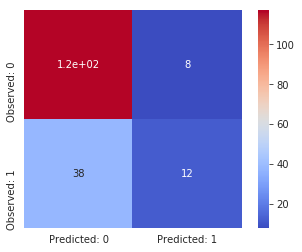

In [53]:
#Heatmap for confusion matrix
sns.heatmap ( conf , cmap = "coolwarm" , square = True , annot = True )
plt.show ( )

In [54]:
true_neg = cm [ 0 , 0 ]
true_pos = cm [ 1 , 1 ]
false_neg = cm [ 1 , 0 ]
false_pos = cm [ 0 , 1 ]
sensitivity = true_pos / ( true_pos + false_neg )
specifcity = true_neg / ( true_neg + false_pos )
precision = ( true_pos + true_neg ) / ( true_neg + true_pos + false_neg + false_pos )
accuracy = true_pos / ( true_pos + false_pos )
print ( "Sensitivity:" , sensitivity )
print ( "Specificity:" , specifcity )
print ( "Precision:" , precision )
print ( "Accuracy:" , accuracy )

Sensitivity: 0.24
Specificity: 0.936
Precision: 0.7371428571428571
Accuracy: 0.6


In [55]:
lr_pred_prob = lr.predict_proba ( X_test )
lr_pred_prob_df = pd.DataFrame ( lr_pred_prob , columns = [ "Not Being a liver patient" , "Being a Liver Patient" ] )
lr_pred_prob_df.head ( )

,Not Being a liver patient,Being a Liver Patient
0,0.849896,0.150104
1,0.487312,0.512688
2,0.834629,0.165371
3,0.830043,0.169957
4,0.968735,0.031265


In [56]:
for i in range ( 1 , 15 ):
    lr_pred2 = binarize ( lr_pred_prob , i / 20 ) [ : , 1 ]
    conf_mat = confusion_matrix ( y_test , lr_pred2 )
    print ( conf_mat )
    print ( "Threshold:" , i / 20 )
    print ( "Errors:" , conf_mat [ 1 , 0 ] + conf_mat [ 0 , 1 ] ) 
    print ( "Type-II errors:" , conf_mat [ 0 , 1 ] )
    print ( "Specificity:" , round ( conf_mat [ 0 , 0 ] / ( conf_mat [ 0 , 0 ] + conf_mat [ 0 , 1 ] ) , 3 ) )
    print ( "Sensitivity:" , round ( conf_mat [ 1 , 1 ] / ( conf_mat [ 1 , 1 ] + conf_mat [ 1 , 0 ] ) , 3 ) )
    print ( "\n" )

[[32 93]
 [ 0 50]]
Threshold: 0.05
Errors: 93
Type-II errors: 93
Specificity: 0.256
Sensitivity: 1.0


[[46 79]
 [ 1 49]]
Threshold: 0.1
Errors: 80
Type-II errors: 79
Specificity: 0.368
Sensitivity: 0.98


[[53 72]
 [ 3 47]]
Threshold: 0.15
Errors: 75
Type-II errors: 72
Specificity: 0.424
Sensitivity: 0.94


[[61 64]
 [ 6 44]]
Threshold: 0.2
Errors: 70
Type-II errors: 64
Specificity: 0.488
Sensitivity: 0.88


[[68 57]
 [10 40]]
Threshold: 0.25
Errors: 67
Type-II errors: 57
Specificity: 0.544
Sensitivity: 0.8


[[80 45]
 [13 37]]
Threshold: 0.3
Errors: 58
Type-II errors: 45
Specificity: 0.64
Sensitivity: 0.74


[[88 37]
 [21 29]]
Threshold: 0.35
Errors: 58
Type-II errors: 37
Specificity: 0.704
Sensitivity: 0.58


[[105  20]
 [ 27  23]]
Threshold: 0.4
Errors: 47
Type-II errors: 20
Specificity: 0.84
Sensitivity: 0.46


[[111  14]
 [ 33  17]]
Threshold: 0.45
Errors: 47
Type-II errors: 14
Specificity: 0.888
Sensitivity: 0.34


[[117   8]
 [ 38  12]]
Threshold: 0.5
Errors: 46
Type-II errors:

- We can see that the best threshold obtained is 0.55 with only 6 Type-II errors.

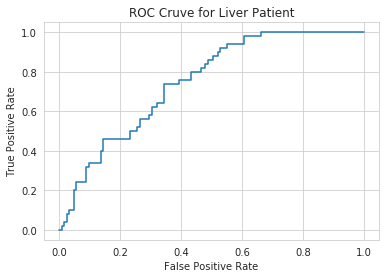

In [57]:
#Plotting ROC curve
fpr , tpr , threshold = roc_curve ( y_test , lr_pred_prob [ : , 1 ] )
plt.plot ( fpr , tpr )
plt.title ( "ROC Cruve for Liver Patient" )
plt.xlabel ( "False Positive Rate" )
plt.ylabel ( "True Positive Rate" )
plt.grid ( True )
plt.show ( )

In [58]:
roc_auc_score ( y_test , lr_pred_prob [ : , 1 ] )

0.7478400000000001

- We can look at Confusion matrix, probabilities of being a Liver patient, Sensitivity, Specificity, getting best threshold using Binarize and ROC curve which indicates how well probabilities from positive class are seperated from negative class.

- We will try implementing all the other models like Logit using ML, Random Forest, Decision Tree, Naive Bayes and K-Nearest Neighbours. 
- We will fit a base model for all th models and check which model performs the best
- We will perform the hyperparamter tuning for the same.too.

###### Logit using ML:

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', fit_intercept=True)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_prob = logreg.predict_proba(x_test)
y_prob

array([[7.32586083e-01, 2.67413917e-01],
       [4.72983441e-01, 5.27016559e-01],
       [7.89979069e-01, 2.10020931e-01],
       [8.16177833e-01, 1.83822167e-01],
       [9.64905193e-01, 3.50948066e-02],
       [9.52882090e-01, 4.71179102e-02],
       [9.99999634e-01, 3.65989422e-07],
       [8.07336976e-01, 1.92663024e-01],
       [9.69289171e-01, 3.07108289e-02],
       [8.53642351e-01, 1.46357649e-01],
       [5.78245368e-01, 4.21754632e-01],
       [8.49338857e-01, 1.50661143e-01],
       [7.15082601e-01, 2.84917399e-01],
       [3.14364477e-01, 6.85635523e-01],
       [7.19429299e-01, 2.80570701e-01],
       [6.64521583e-01, 3.35478417e-01],
       [9.78073712e-01, 2.19262877e-02],
       [5.79995636e-01, 4.20004364e-01],
       [5.37612690e-01, 4.62387310e-01],
       [6.28834457e-01, 3.71165543e-01],
       [5.86877702e-01, 4.13122298e-01],
       [9.20498565e-01, 7.95014351e-02],
       [9.26238231e-01, 7.37617689e-02],
       [4.45048320e-01, 5.54951680e-01],
       [9.972210

In [61]:
y_prob = logreg.predict_proba(x_test)[:,1]
y_prob

array([2.67413917e-01, 5.27016559e-01, 2.10020931e-01, 1.83822167e-01,
       3.50948066e-02, 4.71179102e-02, 3.65989422e-07, 1.92663024e-01,
       3.07108289e-02, 1.46357649e-01, 4.21754632e-01, 1.50661143e-01,
       2.84917399e-01, 6.85635523e-01, 2.80570701e-01, 3.35478417e-01,
       2.19262877e-02, 4.20004364e-01, 4.62387310e-01, 3.71165543e-01,
       4.13122298e-01, 7.95014351e-02, 7.37617689e-02, 5.54951680e-01,
       2.77898558e-03, 5.76864590e-02, 4.09923110e-01, 5.18756801e-01,
       5.16554334e-01, 5.63592035e-01, 5.43399922e-01, 4.21691293e-03,
       5.56765535e-01, 1.57265762e-01, 2.06935813e-01, 2.07942581e-01,
       1.79661124e-01, 1.02023377e-01, 1.10732367e-01, 1.08903339e-01,
       2.19870721e-01, 3.75208982e-01, 1.84933086e-01, 2.46727912e-01,
       3.34509911e-01, 2.13290441e-01, 5.57961321e-03, 3.42408203e-02,
       2.55868090e-01, 3.12352128e-01, 3.38123730e-01, 3.16418045e-01,
       3.88380030e-02, 1.14081493e-02, 4.54182701e-01, 6.00655082e-01,
      

In [62]:
y_pred = logreg.predict(x_test) 
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
accuracy_score_Logit_ML = accuracy_score(y_test,y_pred)
accuracy_score_Logit_ML

0.7257142857142858

In [64]:
#For train data
y_prob_train = logreg.predict_proba(x_train)[:,1]
y_pred_train = logreg.predict(x_train)

In [65]:
print('Confussion matrix - Train: ','\n',confusion_matrix(y_train,y_pred_train))
print('Overall accuracy - Train: ',accuracy_score(y_train,y_pred_train))
print('Confussion matrix - Test: ','\n',confusion_matrix(y_test,y_pred))
print('Overall accuracy - Test: ',accuracy_score(y_test,y_pred))

Confussion matrix - Train:  
 [[274  17]
 [ 93  24]]
Overall accuracy - Train:  0.7303921568627451
Confussion matrix - Test:  
 [[117   8]
 [ 40  10]]
Overall accuracy - Test:  0.7257142857142858


In [66]:
prob_plot = pd.DataFrame([y_prob_train, y_train]).T
prob_plot

,0,1
0,0.501010,0.0
1,0.485129,1.0
2,0.269365,0.0
3,0.003735,0.0
4,0.404845,1.0
...,...,...
403,0.222871,0.0
404,0.259503,0.0
405,0.292097,0.0
406,0.064848,0.0


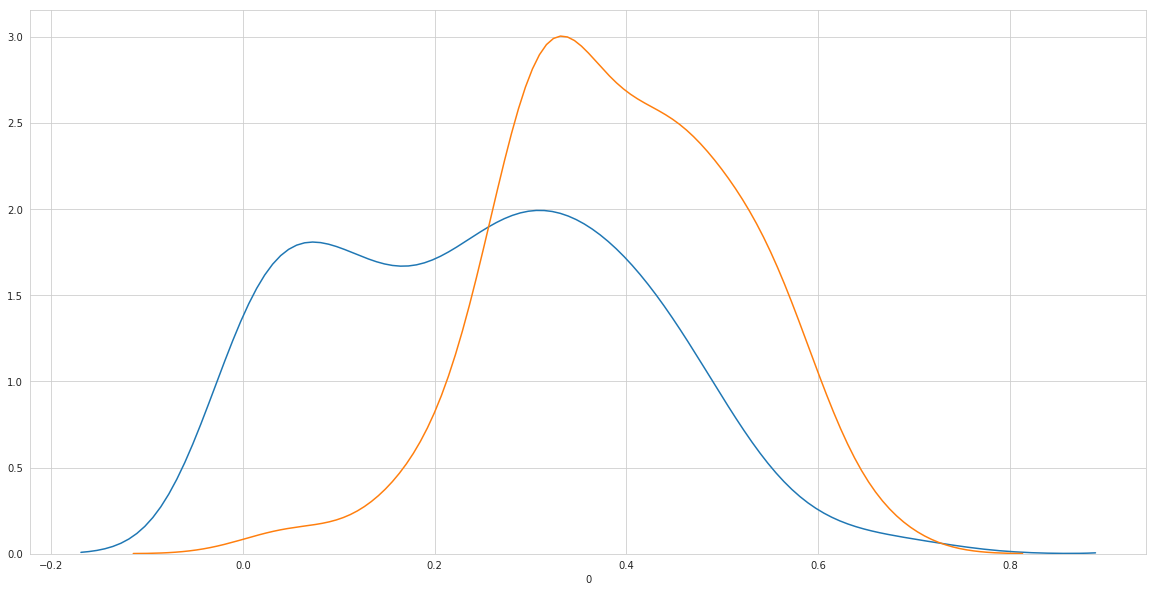

In [67]:
plt.figure(figsize=(20,10))
sns.distplot(prob_plot[0][prob_plot[1]==0],hist=False)
sns.distplot(prob_plot[0][prob_plot[1]==1],hist=False)
plt.show()

In [68]:
logreg = LogisticRegression(solver='liblinear', fit_intercept=True)
logreg.fit(x_train, y_train)
y_prob = logreg.predict_proba(x_test)[:,1]
y_pred = logreg.predict(x_test) #to change threshold should do it manually
#For train data
y_prob_train = logreg.predict_proba(x_train)[:,1]
y_pred_train = logreg.predict(x_train)

AUC of train:  0.755514435926807


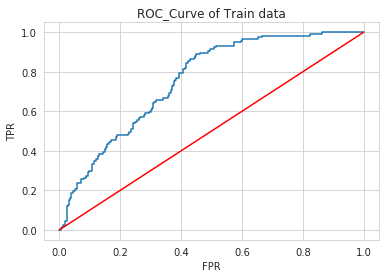

In [69]:
print('AUC of train: ', roc_auc_score(y_train, y_prob_train)) #for train data
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_Curve of Train data')
plt.show()

AUC of test:  0.75712


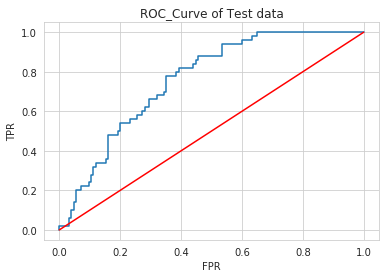

In [70]:
print('AUC of test: ', roc_auc_score(y_test, y_prob)) #for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_Curve of Test data')
plt.show()

In [71]:
print(thresholds) 
#first one is more than 1

[1.68563552e+00 6.85635523e-01 5.76184960e-01 5.66509061e-01
 5.63592035e-01 5.54951680e-01 5.43399922e-01 5.41004737e-01
 5.37342569e-01 5.18756801e-01 4.89174511e-01 4.75552458e-01
 4.62387310e-01 4.58498457e-01 4.56232297e-01 4.41745883e-01
 4.37915642e-01 4.29965547e-01 4.29842221e-01 4.21754632e-01
 4.12170108e-01 4.10644113e-01 4.09923110e-01 3.89090310e-01
 3.75621076e-01 3.75208982e-01 3.75141412e-01 3.69567714e-01
 3.62577016e-01 3.57350177e-01 3.47211297e-01 3.44006659e-01
 3.42328915e-01 3.38210169e-01 3.38123730e-01 3.37430016e-01
 3.34509911e-01 3.25526019e-01 3.21654753e-01 3.16418045e-01
 3.14096604e-01 3.12352128e-01 3.01816505e-01 2.91902299e-01
 2.82695834e-01 2.81260304e-01 2.80570701e-01 2.76328484e-01
 2.55868090e-01 2.52786183e-01 2.49221073e-01 2.47922819e-01
 2.47712931e-01 2.47500080e-01 2.10020931e-01 1.93640304e-01
 1.65719504e-01 1.57265762e-01 1.46357649e-01 1.45818226e-01
 1.35178711e-01 1.15992625e-01 1.46221179e-09]


In [72]:
thresholds[thresholds>1]=1 #made value more than 1 to 1
thresholds

array([1.00000000e+00, 6.85635523e-01, 5.76184960e-01, 5.66509061e-01,
       5.63592035e-01, 5.54951680e-01, 5.43399922e-01, 5.41004737e-01,
       5.37342569e-01, 5.18756801e-01, 4.89174511e-01, 4.75552458e-01,
       4.62387310e-01, 4.58498457e-01, 4.56232297e-01, 4.41745883e-01,
       4.37915642e-01, 4.29965547e-01, 4.29842221e-01, 4.21754632e-01,
       4.12170108e-01, 4.10644113e-01, 4.09923110e-01, 3.89090310e-01,
       3.75621076e-01, 3.75208982e-01, 3.75141412e-01, 3.69567714e-01,
       3.62577016e-01, 3.57350177e-01, 3.47211297e-01, 3.44006659e-01,
       3.42328915e-01, 3.38210169e-01, 3.38123730e-01, 3.37430016e-01,
       3.34509911e-01, 3.25526019e-01, 3.21654753e-01, 3.16418045e-01,
       3.14096604e-01, 3.12352128e-01, 3.01816505e-01, 2.91902299e-01,
       2.82695834e-01, 2.81260304e-01, 2.80570701e-01, 2.76328484e-01,
       2.55868090e-01, 2.52786183e-01, 2.49221073e-01, 2.47922819e-01,
       2.47712931e-01, 2.47500080e-01, 2.10020931e-01, 1.93640304e-01,
      

In [73]:
print('AUC of train: ', roc_auc_score(y_train, y_prob_train)) #for train data

AUC of train:  0.755514435926807


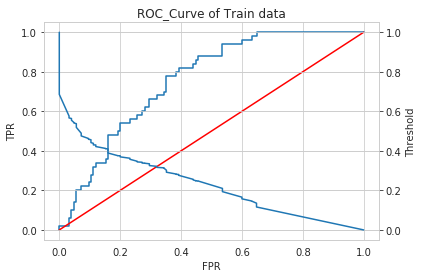

In [74]:
fig, ax = plt.subplots()

ax.plot(fpr, tpr) #blue color
ax.plot(fpr, fpr, 'r-') #red color
plt.xlabel('FPR')
plt.ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds) 
ax1.set_ylabel('Threshold')

plt.title('ROC_Curve of Train data')
plt.show()

###### Decision Tree:

In [75]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_train = dt.predict(x_train)
y_pred = dt.predict(x_test)
y_prob = dt.predict_proba(x_test)

In [76]:
print('Accuracy of Decision Tree_train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree_test: ', accuracy_score(y_pred, y_test))
accuracy_score_DT = accuracy_score(y_pred, y_test)

Accuracy of Decision Tree_train:  1.0
Accuracy of Decision Tree_test:  0.6571428571428571


In [77]:
print(classification_report ( y_test , y_pred ))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       125
           1       0.41      0.46      0.43        50

    accuracy                           0.66       175
   macro avg       0.59      0.60      0.59       175
weighted avg       0.67      0.66      0.66       175



###### Random Forest:

In [78]:
rfc = RandomForestClassifier(n_estimators=10,random_state=1)
rfc.fit(x_train,y_train)
y_pred_train = rfc.predict(x_train)
y_prob_train = rfc.predict_proba(x_train)[:,1]
y_pred = rfc.predict(x_test)
y_prob = rfc.predict_proba(x_test)[:,1]

In [79]:
print('Accuracy of Random Forest_train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Random Forest_test: ', accuracy_score(y_pred, y_test))
print('AUC of Random Forest_train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of Random Forest_test: ', roc_auc_score(y_test, y_prob))
accuracy_score_RF = accuracy_score(y_pred, y_test)

Accuracy of Random Forest_train:  0.9803921568627451
Accuracy of Random Forest_test:  0.68
AUC of Random Forest_train:  0.997973389725967
AUC of Random Forest_test:  0.6732


In [80]:
print(classification_report ( y_test , y_pred ))

              precision    recall  f1-score   support

           0       0.73      0.87      0.80       125
           1       0.38      0.20      0.26        50

    accuracy                           0.68       175
   macro avg       0.56      0.54      0.53       175
weighted avg       0.63      0.68      0.64       175



###### KNN:

In [81]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_train = knn.predict(x_train)
y_prob_train = knn.predict_proba(x_train)[:,1]
y_pred = knn.predict(x_test)
y_prob = knn.predict_proba(x_test)[:,1]

In [82]:
print('Accuracy of kNN_train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of kNN_test: ', accuracy_score(y_pred, y_test))
print('AUC of kNN_train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of kNN_test: ', roc_auc_score(y_test, y_prob))
accuracy_score_KNN = accuracy_score(y_pred, y_test)

Accuracy of kNN_train:  0.7965686274509803
Accuracy of kNN_test:  0.6114285714285714
AUC of kNN_train:  0.8486063382970599
AUC of kNN_test:  0.58616


In [83]:
print(classification_report ( y_test , y_pred ))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       125
           1       0.30      0.26      0.28        50

    accuracy                           0.61       175
   macro avg       0.51      0.51      0.51       175
weighted avg       0.60      0.61      0.60       175



###### Naive Bayes:

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

gnb = GaussianNB ( )
gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_prob_train = gnb.predict_proba(X_train)[:,1]

y_pred = gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)[:,1]

In [85]:
print('Accuracy of kNN_train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of kNN_test: ', accuracy_score(y_pred, y_test))
print('AUC of kNN_train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of kNN_test: ', roc_auc_score(y_test, y_prob))
accuracy_score_NB = accuracy_score(y_pred, y_test)

Accuracy of kNN_train:  0.5294117647058824
Accuracy of kNN_test:  0.5885714285714285
AUC of kNN_train:  0.7117514024730519
AUC of kNN_test:  0.7816000000000001


In [86]:
d = {'Model': ['Logit with ML', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes'], 
     'Accuracy': [accuracy_score_Logit*100,accuracy_score_DT*100, accuracy_score_RF*100, accuracy_score_KNN*100 , accuracy_score_NB*100]}
df = pd.DataFrame(data=d)
df

,Model,Accuracy
0,Logit with ML,74.509804
1,Decision Tree,65.714286
2,Random Forest,68.000000
3,KNN,61.142857
4,Naive Bayes,58.857143


###### Hyperparameter tuning for DT:

In [87]:
from scipy.stats import randint as sp_randint
dt = DecisionTreeClassifier(random_state=1)
params = {'max_depth' : sp_randint(2,10),
          'min_samples_split' : sp_randint(2,50),
          'min_samples_leaf' : sp_randint(1,20),
         'criterion' : ['gini','entropy']}
rand_search = RandomizedSearchCV(dt, param_distributions=params, cv=3, random_state=1)
rand_search.fit(X,y)
print(rand_search.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 7}


In [88]:
dt = DecisionTreeClassifier(**rand_search.best_params_)

dt.fit(x_train,y_train)

y_pred_train = dt.predict(x_train)
y_prob_train = dt.predict_proba(x_train)[:,1]

y_pred = dt.predict(x_test)
y_prob = dt.predict_proba(x_test)[:,1]

In [89]:
print('Accuracy of Decision Tree_train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree_test: ', accuracy_score(y_pred, y_test))
print('AUC of Decision Tree_train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of Decision Tree_test: ', roc_auc_score(y_test, y_prob))
accuracy_score_DT_HyperTuning = accuracy_score(y_pred, y_test)

Accuracy of Decision Tree_train:  0.7132352941176471
Accuracy of Decision Tree_test:  0.7142857142857143
AUC of Decision Tree_train:  0.726290128351984
AUC of Decision Tree_test:  0.73664


###### Hyperparameter tuning for RF:

In [90]:
rfc = RandomForestClassifier(random_state=1)
params = {'n_estimators': sp_randint(5,25),
          'criterion' : ['gini','entropy'],
          'max_depth' : sp_randint(2,10),
          'min_samples_split' : sp_randint(2,20),
          'min_samples_leaf' : sp_randint(1,20),
          'max_features' : sp_randint(2,15)}
rand_search_rfc = RandomizedSearchCV(rfc, param_distributions=params, random_state=1, cv=3)
rand_search_rfc.fit(X,y)
rand_search_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 2,
 'min_samples_leaf': 17,
 'min_samples_split': 3,
 'n_estimators': 17}

In [91]:
rfc = RandomForestClassifier(**rand_search_rfc.best_params_)
rfc.fit(x_train,y_train)
y_pred_train = rfc.predict(x_train)
y_prob_train = rfc.predict_proba(x_train)[:,1]
y_pred = rfc.predict(x_test)
y_prob = rfc.predict_proba(x_test)[:,1]

In [92]:
print('Accuracy of RandomForest_train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of RandomForest_test: ', accuracy_score(y_pred, y_test))
print('AUC of RandomForest_train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of RandomForest_test: ', roc_auc_score(y_test, y_prob))
accuracy_score_RF_HyperTuning = accuracy_score(y_pred, y_test)

Accuracy of RandomForest_train:  0.7450980392156863
Accuracy of RandomForest_test:  0.6914285714285714
AUC of RandomForest_train:  0.8270185332041001
AUC of RandomForest_test:  0.7615999999999999


###### Hyperparameter tuning for KNN:

In [93]:
knn = KNeighborsClassifier()
params = {'n_neighbors': sp_randint(5,25),
          'p' : sp_randint(1,5)}
rand_search_knn = RandomizedSearchCV(knn, param_distributions=params, cv=3, random_state=1)
rand_search_knn.fit(X,y)
rand_search_knn.best_params_

{'n_neighbors': 10, 'p': 4}

In [94]:
knn = KNeighborsClassifier(**rand_search_knn.best_params_)
knn.fit(x_train,y_train)
y_pred_train = knn.predict(x_train)
y_prob_train = knn.predict_proba(x_train)[:,1]
y_pred = knn.predict(x_test)
y_prob = knn.predict_proba(x_test)[:,1]

In [95]:
print('Accuracy of kNN_train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of kNN_test: ', accuracy_score(y_pred, y_test))
print('AUC of kNN_train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of kNN_test: ', roc_auc_score(y_test, y_prob))
accuracy_score_KNN_HyperTuning = accuracy_score(y_pred, y_test)

Accuracy of kNN_train:  0.7696078431372549
Accuracy of kNN_test:  0.68
AUC of kNN_train:  0.8149469850500779
AUC of kNN_test:  0.62128


In [96]:
d = {'Model': ['Logit with ML','Decision Tree', 'Random Forest', 'KNN'], 
     'Accuracy_HyperTuning': [accuracy_score_Logit_ML*100, accuracy_score_DT_HyperTuning*100, accuracy_score_RF_HyperTuning*100, accuracy_score_KNN_HyperTuning*100]}
df2 = pd.DataFrame(data=d)

In [97]:
print('Accuracy before tuning:')
df

Accuracy before tuning:


,Model,Accuracy
0,Logit with ML,74.509804
1,Decision Tree,65.714286
2,Random Forest,68.000000
3,KNN,61.142857
4,Naive Bayes,58.857143


In [98]:
print('Accuracy after tuning:')
df2

Accuracy after tuning:


,Model,Accuracy_HyperTuning
0,Logit with ML,72.571429
1,Decision Tree,71.428571
2,Random Forest,69.142857
3,KNN,68.000000


In [99]:
d = {'Model': ['Logit with ML','Decision Tree', 'Random Forest', 'KNN', 'NaiveBayes'], 
     'Accuracy': [accuracy_score_Logit*100,accuracy_score_DT*100, accuracy_score_RF*100, accuracy_score_KNN*100 ,
                  accuracy_score_NB*100],
     'Accuracy_HyperTuning': [accuracy_score_Logit_ML*100, accuracy_score_DT_HyperTuning*100,
                              accuracy_score_RF_HyperTuning*100, accuracy_score_KNN_HyperTuning*100, accuracy_score_NB*100]
    }
df3 = pd.DataFrame(data=d)

In [100]:
print('Accuracy comparision before and after tuning:')
df3

Accuracy comparision before and after tuning:


,Model,Accuracy,Accuracy_HyperTuning
0,Logit with ML,74.509804,72.571429
1,Decision Tree,65.714286,71.428571
2,Random Forest,68.000000,69.142857
3,KNN,61.142857,68.000000
4,NaiveBayes,58.857143,58.857143


- From the above dataframes we can conclude that The best accuracy model with accuracy score 74.50% is using logestic Regression befor hyperparameter tuning.
- After hyper parameter tuning the highest accuracy that is achieved is 72.57% which is lower than that of before tuning.
- Rest all the accuracy has comparatevely increased

#### Summerizing the overall fit of the model:

- It can be seen that Logit before tuning gives the best model and it was the best fit amongst all the other models. 
- The changes which made the model better was solver='lbfgs' during fitting the base model.

#### Features affecting the target more :

In [101]:
target

Age        -0.137351
TB         -0.220208
DB         -0.246046
AAP        -0.184866
SGPT       -0.163416
SGOT       -0.151934
TP          0.035008
ALB         0.161388
AGRAGR      0.162843
Selector    1.000000
Name: Selector, dtype: float64

In [102]:
print('The variables affecting the target variable at most are: ',cols[1:6])

The variables affecting the target variable at most are:  ['Age', 'DB', 'SGPT', 'TP', 'ALB']


#### Changes from the base model that had the most effect on model performance:

- Changing the solver='lbfgs' to solver='liblinear' decreased the model accuracy by 0.02

#### Key risks to your results and interpretation:

- The key risks to my interpretations are that it might change as new data is brought in.
- Depending on the data the hyperparameters might need some tuning again.
- Other mode could work better such as Xgboost.